### 1. imports

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

### 2. 예측

`-` (x,y)

`-` 언더라잉 $\leftarrow$ 우리의 진짜 목표 X

`-` 예측 $\leftarrow$ 우리의 진짜 목표 !!

#### A. 데이터

In [3]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
y = x * 4 + 2.5 + eps
x,y = x.reshape(-1,1), y.reshape(-1,1)

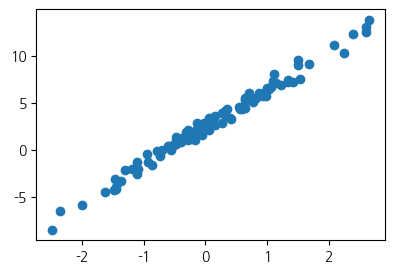

In [4]:
plt.plot(x,y,'o')

### B. 학습

In [5]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
## 
for epoc in range(200):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

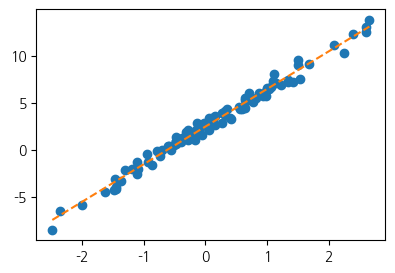

In [6]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

In [7]:
net[0].weight, net[0].bias

(Parameter containing:
 tensor([[4.0042]], requires_grad=True),
 Parameter containing:
 tensor([2.4459], requires_grad=True))

### C. 예측

`-` 온도가 0.1도 일 때, 커피를 얼마나 팔까?

In [9]:
0.1 * 4.0042 + 2.4459 

2.84632

In [10]:
xx = torch.tensor([[0.1]])
net(xx)

tensor([[2.8463]], grad_fn=<AddmmBackward0>)

`-` 온도가 0.2도 일 때, 커피를 얼마나 팔까?

In [11]:
0.2 * 4.0042 + 2.4459 

3.24674

In [12]:
xx = torch.tensor([[0.2]])
net(xx)

tensor([[3.2467]], grad_fn=<AddmmBackward0>)

`-` 온도가 [0.1,0.2] 일 때의 예측값을 한번에 보고싶다면?

In [13]:
xx = torch.tensor([[0.1],
                   [0.2]])
net(xx)

tensor([[2.8463],
        [3.2467]], grad_fn=<AddmmBackward0>)

### 4. 오버피팅(시벤코정리의 이면)

#### A. 오버피팅

`-` “어떤 모델이 주어진 데이터에 너무 꼭 맞춰져 있어서, 새로운 데이터나 미래의 결과를 잘 예측하지 못할 수 있는 상태”를 의미


`-` 제 개념: 데이터를 “데이터 = 언더라잉 + 오차”라고 생각할때 우리가
    데이터로부터 적합할 것은 언더라잉인데 오차항을 적합하고 있는 현상.


### B. 오버피팅 예시

`-` m이 매우 클 때 아래의 네트워크는 거의 무엇이든 맞출 수 있다고 보면 된다

-   $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{h}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$
-   $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{sig}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$
-   $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{relu}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$

`-` 그런데 종종 맞추지 말아야 할 것들도 맞춘다.

$$\text{model:} \quad y_i = (0\times x_i) + \epsilon_i,~~ \text{where}~ \epsilon_i \sim N(0,0.01^2)$$

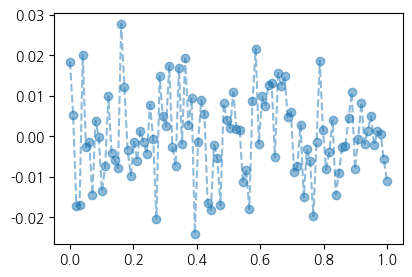

In [14]:
torch.manual_seed(5) 
x = torch.linspace(0,1,100).reshape(100,1)
y = torch.randn(100).reshape(100,1)*0.01
plt.plot(x,y,'--o',alpha=0.5)

In [15]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(1,512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

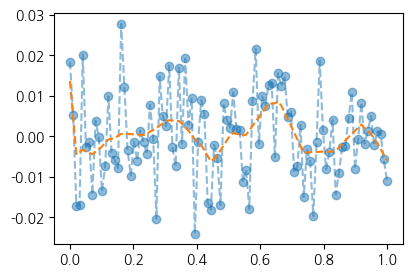

In [16]:
plt.plot(x,y,'--o',alpha=0.5)
plt.plot(x,net(x).data,'--')

#### C. 오버피팅이라는 증거!(train/test)

`-` 데이터를 분리해보자

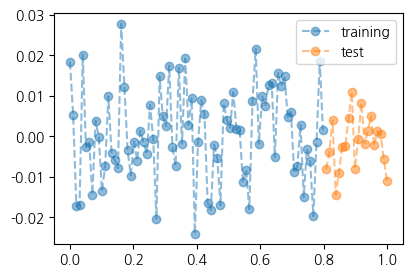

In [17]:
torch.manual_seed(5) 
x_all = torch.linspace(0,1,100).reshape(100,1)
y_all = torch.randn(100).reshape(100,1)*0.01
x,xx = x_all[:80], x_all[80:]
y,yy = y_all[:80], y_all[80:]
plt.plot(x,y,'--o',alpha=0.5,label="training")
plt.plot(xx,yy,'--o',alpha=0.5,label="test")
plt.legend()

`-` train만 학습

In [18]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(1,512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

`-` training data로 학습한 net을 training data에 적용

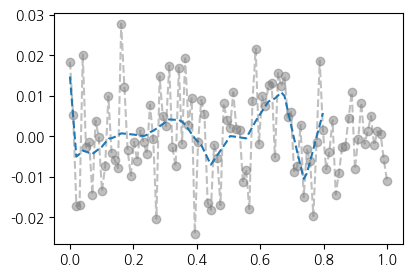

In [19]:
plt.plot(x_all,y_all,'--o',alpha=0.5,color="gray")
plt.plot(x,net(x).data,'--')

`-` training에서는 그럭저럭 맞춤

`-` traing data로 학습한 net 을 test data에 적용

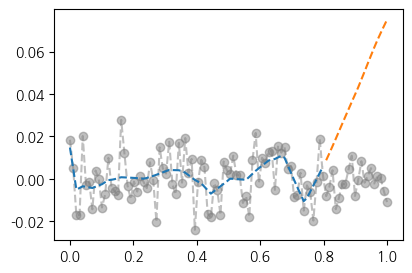

In [20]:
plt.plot(x_all,y_all,'--o',alpha=0.5,color="gray")
plt.plot(x,net(x).data,'--')
plt.plot(xx,net(xx).data,'--')

`-` train 에서는 그럭저럭 맞추지만 test에서는 맞추지 못함 = **오버피팅**

-   train에서는 그럭저럭 잘 맞추는데 test에서는 엉망이다 = overfit

## D. 시벤코정리의 올바른 이해

> **Note**
>
> **시벤코의 항변(?)** (Cybenko 1989)
>
> 하나의 은닉층을 가지는 아래와 같은 꼴의 네트워크
> $net: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$는
>
> ``` python
> net = torch.nn.Sequential(
>     torch.nn.Linear(p,???),
>     torch.nn.Sigmoid(), ## <-- 여기에 렐루를 써도 된다. 
>     torch.nn.Linear(???,q)
> )
> ```
>
> 모든 보렐가측함수
>
> $$f: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$$
>
> 를 원하는 정확도로 “근사”시킬 수 있다. 쉽게 말하면
> ${\bf X} \to {\bf y}$ 인 어떠한 복잡한 규칙라도 하나의 은닉층을 가진
> 신경망이 원하는 정확도로 근사시킨다는 의미이다. **그렇지만 이러한
> 규칙이 네크워크가 학습하지 못했던 자료 (처음 보는 자료, unseen data)**
> ${\bf XX}_{m \times p}$, ${\bf yy}_{m \times q}$ **에 대하여서도
> 올바르게 적용된다라는 보장은 없다**. 시벤코는 단지 `net`가 가지는
> 표현력의 한계를 수학적으로 밝혔을 뿐이다.

### 5. 드랍아웃

#### A. 오버피팅의 해결

`-` 오버피팅의 해결책: 드랍아웃

`-` 데이터

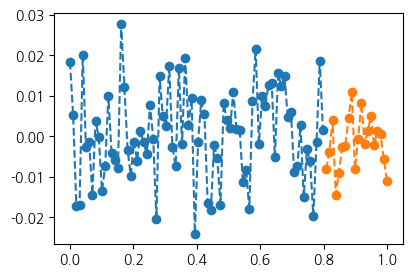

In [21]:
torch.manual_seed(5) 
x_all = torch.linspace(0,1,100).reshape(100,1)
y_all = torch.randn(100).reshape(100,1)*0.01
#plt.plot(x_all,y_all,'--o',alpha=0.5)
x,y = x_all[:80], y_all[:80]
xx,yy = x_all[80:], y_all[80:]
plt.plot(x,y,'--o',color="C0")
plt.plot(xx,yy,'--o',color="C1")

`-` 학습

In [22]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(1,512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(512,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과 시각화(잘못된 사용)

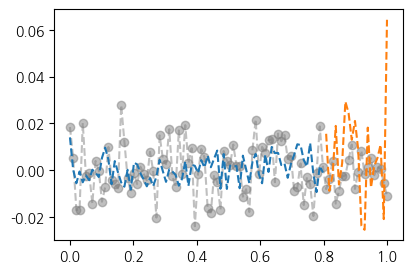

In [23]:
plt.plot(x_all,y_all,'--o',alpha=0.5,color="gray")
plt.plot(x,net(x).data,'--')
plt.plot(xx,net(xx).data,'--')

`-` 결과 시각화 (올바른 사용)

In [24]:
net.training 

True

In [25]:
net.eval()

Sequential(
  (0): Linear(in_features=1, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.8, inplace=False)
  (3): Linear(in_features=512, out_features=1, bias=True)
)

In [26]:
net.training

False

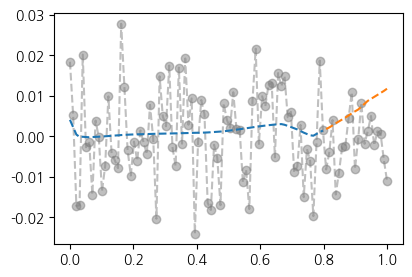

In [27]:
plt.plot(x_all,y_all,'--o',alpha=0.5,color="gray")
plt.plot(x,net(x).data,'--')
plt.plot(xx,net(xx).data,'--')

#### B. 드랍아웃 레이어

`-` 드랍아웃의 성질 1 : 드랍아웃의 계산 방식 이해 

In [28]:
u = torch.randn(10,2)
d = torch.nn.Dropout(0.9)
u

tensor([[ 0.5951,  0.2245],
        [ 0.8238,  0.5230],
        [ 0.4772, -1.0465],
        [-0.6826,  0.4257],
        [ 0.5113,  0.4130],
        [-0.3946,  0.0827],
        [ 1.4149, -1.7569],
        [ 0.3142, -0.9964],
        [-0.4613,  0.3530],
        [-0.2743, -0.5558]])

In [29]:
d(u)

tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, -0.0000],
        [-0.0000, 0.0000],
        [5.1128, 4.1303],
        [-0.0000, 0.0000],
        [0.0000, -0.0000],
        [0.0000, -0.0000],
        [-0.0000, 3.5305],
        [-0.0000, -0.0000]])

`-`   90%의 드랍아웃: 드랍아웃층의 입력 중 임의로 90%를 골라서 결과를
    0으로 만든다. + 그리고 0이 되지않고 살아남은 값들은 10배 만큼 값이
    커진다.
    
`-`   남은값을 10배 키우는 이유? 출력의 평균값을 보정하기 위해서

`-` 드랍아웃의 성질2: 드랍아웃을 on/off 하는 방법을 이해해보자.

In [31]:
u = torch.randn(10,2)
u

tensor([[ 0.8395,  1.8825],
        [-0.0415, -2.3987],
        [-0.3658, -1.3403],
        [-1.4066,  0.7178],
        [-1.0465,  0.9663],
        [-1.2350,  1.3424],
        [-1.1903,  0.3955],
        [ 0.4236, -0.7882],
        [-0.4348,  0.2669],
        [-0.9102, -0.3219]])

In [32]:
net = torch.nn.Sequential(
    torch.nn.Dropout(0.9)
)
net

Sequential(
  (0): Dropout(p=0.9, inplace=False)
)

In [33]:
u,net(u)

(tensor([[ 0.8395,  1.8825],
         [-0.0415, -2.3987],
         [-0.3658, -1.3403],
         [-1.4066,  0.7178],
         [-1.0465,  0.9663],
         [-1.2350,  1.3424],
         [-1.1903,  0.3955],
         [ 0.4236, -0.7882],
         [-0.4348,  0.2669],
         [-0.9102, -0.3219]]),
 tensor([[  0.0000,   0.0000],
         [ -0.0000,  -0.0000],
         [ -0.0000,  -0.0000],
         [-14.0662,   0.0000],
         [ -0.0000,   0.0000],
         [-12.3497,   0.0000],
         [ -0.0000,   0.0000],
         [  4.2361,  -0.0000],
         [ -0.0000,   0.0000],
         [ -0.0000,  -3.2190]]))

In [34]:
net.training

True

`-` 드랍아웃이 안먹히고 통과

In [35]:
net.eval() # 드랍아웃이 무력화

Sequential(
  (0): Dropout(p=0.9, inplace=False)
)

In [36]:
u,net(u)

(tensor([[ 0.8395,  1.8825],
         [-0.0415, -2.3987],
         [-0.3658, -1.3403],
         [-1.4066,  0.7178],
         [-1.0465,  0.9663],
         [-1.2350,  1.3424],
         [-1.1903,  0.3955],
         [ 0.4236, -0.7882],
         [-0.4348,  0.2669],
         [-0.9102, -0.3219]]),
 tensor([[ 0.8395,  1.8825],
         [-0.0415, -2.3987],
         [-0.3658, -1.3403],
         [-1.4066,  0.7178],
         [-1.0465,  0.9663],
         [-1.2350,  1.3424],
         [-1.1903,  0.3955],
         [ 0.4236, -0.7882],
         [-0.4348,  0.2669],
         [-0.9102, -0.3219]]))

`-` 드랍아웃레이어 정리

-   계산: (1) 입력의 일부를 임의로 0으로 만드는 역할 (2) 0이 안된것들은
    스칼라배하여 드랍아웃을 통과한 모든 숫자들의 총합이 대체로 일정하게
    되도록 조정
-   on/off: 학습시에는 dropout on / 학습을 하지 않을 경우는 dropout off
-   느낌: 일부러 패널티를 안고 학습하는 느낌..
-   효과: 오버피팅을 억제하는 효과가 있음

> 참고: 오버피팅을 잡는 방법은 드랍아웃만 있는게 아니다..

#### C. 드랍아웃 레이어의 위치

`-` ReLU,dropout의 특이한 성질: 순서 상관없음

$\text{dropout}(\text{relu}({\bf x}))=\text{relu}(\text{dropout}({\bf x}))$

In [37]:
u = torch.randn(10,2)
r = torch.nn.ReLU()
d = torch.nn.Dropout()

In [38]:
torch.manual_seed(0)
d(r(u))

tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.5372],
        [2.6658, 2.1870],
        [0.3798, 0.0000],
        [0.0000, 1.6593],
        [0.9300, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000]])

In [39]:
torch.manual_seed(0)
r(d(u))

tensor([[0.0000, 0.0000],
        [-0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.5372],
        [2.6658, 2.1870],
        [0.3798, -0.0000],
        [0.0000, 1.6593],
        [0.9300, 0.0000],
        [0.0000, 0.0000],
        [-0.0000, 0.0000]])

`-` 다른 활성화함수는 성립안함

In [40]:
u = torch.randn(10,2)
s = torch.nn.Sigmoid()
d = torch.nn.Dropout()

In [41]:
torch.manual_seed(0)
d(s(u))

tensor([[0.4801, 0.0000],
        [0.0000, 1.4006],
        [0.3487, 0.0000],
        [0.0000, 1.2299],
        [0.9213, 1.6180],
        [1.1322, 0.0000],
        [0.0000, 1.4407],
        [0.6015, 1.4349],
        [0.0000, 1.7626],
        [0.0000, 0.0000]])

In [42]:
torch.manual_seed(0)
s(d(u))

tensor([[0.0907, 0.5000],
        [0.5000, 0.8452],
        [0.0427, 0.5000],
        [0.5000, 0.7183],
        [0.4218, 0.9472],
        [0.6300, 0.5000],
        [0.5000, 0.8691],
        [0.1561, 0.8657],
        [0.5000, 0.9822],
        [0.5000, 0.5000]])

`-` 결론: 드랍아웃은 활성화 함수 바로 뒤에 오는게 맞음. (그렇지 않다면
0을 만들 수 없는걸?) 그렇지만 ReLU의 경우 활성화 함수 직전에 취하기도
함.